<a href="https://colab.research.google.com/github/robo0803/Lecture_Python/blob/master/%EB%B9%84%ED%8A%B8220510%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%9403_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

In [ ]:
import pandas as pd

## Column 표현 - Series

In [ ]:
se = pd.Series([4,1,2,3]) # 인덱스 자동 생성됨
print(se)

0    4
1    1
2    2
3    3
dtype: int64


In [ ]:
print(se.index)

RangeIndex(start=0, stop=4, step=1)


In [ ]:
print(se.values)

[4 1 2 3]


In [ ]:
se = pd.Series([5,1,7,4], index = ['a','b','c','d'])
print(se)

a    5
b    1
c    7
d    4
dtype: int64


In [ ]:
print(se.index)

Index(['a', 'b', 'c', 'd'], dtype='object')


In [ ]:
se.index = ['1','8','k','b'] # 원하는 대로 인덱스 변경 가능
print(se)

1    5
8    1
k    7
b    4
dtype: int64


In [ ]:
print(se['k'])

7


In [ ]:
filter_se = se%2 ==0 
print(filter_se)

1    False
8    False
k    False
b     True
dtype: bool


In [ ]:
evens = se[filter_se]
print(evens)

b    4
dtype: int64


In [ ]:
evens = se[se%2==0] # 위 명령보다는 이게 더 나음(특히 데이터 개수 많을때)
print(evens)

b    4
dtype: int64


In [ ]:
print(se)
se = se+2  # 행렬과 같은 수치 연산도 가능
print(se)

1    5
8    1
k    7
b    4
dtype: int64
1    7
8    3
k    9
b    6
dtype: int64


In [ ]:
k_e_dic = {'하나':'one','둘':'two','셋':'three'}
se = pd.Series(k_e_dic) # key -> index value -> value
print(se)

하나      one
둘       two
셋     three
dtype: object


In [ ]:
import numpy as np
se = pd.Series([1,np.nan,None,5]) # np.nan , None = > NaN
print(se)

0    1.0
1    NaN
2    NaN
3    5.0
dtype: float64


In [ ]:
print(se.isnull())

0    False
1     True
2     True
3    False
dtype: bool


In [ ]:
se_nu = se[se.isnull()]
print(se_nu)

1   NaN
2   NaN
dtype: float64


In [ ]:
se.unique() # 집합 확인

array([ 1., nan,  5.])

In [ ]:
se.value_counts() 

1.0    1
5.0    1
dtype: int64

In [ ]:
se.describe() # 대표값들 추출

count    2.000000
mean     3.000000
std      2.828427
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

## DataFrame

In [ ]:
df = pd.DataFrame([['홍길동',90,80,70],['강감찬',80,78,90]])
print(df) #  0 1 2 3 : columns / 0 1 : rows

     0   1   2   3
0  홍길동  90  80  70
1  강감찬  80  78  90


In [ ]:
df

,0,1,2,3
0,홍길동,90,80,70
1,강감찬,80,78,90


In [ ]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [ ]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [ ]:
df.index = [1,2]
df.columns=['이름','국어','영어','수학']
df

,이름,국어,영어,수학
1,홍길동,90,80,70
2,강감찬,80,78,90


In [ ]:
df.values

array([['홍길동', 90, 80, 70],
       ['강감찬', 80, 78, 90]], dtype=object)

In [ ]:
df = pd.DataFrame([['홍길동',27,'율도국'],['강감찬',88,'서울']],index=[1,2],columns=['이름','나이','주소'])
df

,이름,나이,주소
1,홍길동,27,율도국
2,강감찬,88,서울


In [ ]:
ns = df['나이'] #단위 column만 추출하면 series만 나옴
ns

1    27
2    88
Name: 나이, dtype: int64

In [ ]:
print(type(ns))

<class 'pandas.core.series.Series'>


In [ ]:
df.describe()

,나이
count,2.000000
mean,57.500000
std,43.133514
min,27.000000
25%,42.250000
50%,57.500000
75%,72.750000
max,88.000000


In [ ]:
df.value_counts()

이름   나이  주소 
강감찬  88  서울     1
홍길동  27  율도국    1
dtype: int64

In [ ]:
sub_df = df[['이름','주소']] # 리스트 안에 넣으면 서브 데이터 프레임을 반환받음
sub_df

,이름,주소
1,홍길동,율도국
2,강감찬,서울


In [ ]:
print(sub_df)

    이름   주소
1  홍길동  율도국
2  강감찬   서울


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      2 non-null      object
 1   나이      2 non-null      int64 
 2   주소      2 non-null      object
dtypes: int64(1), object(2)
memory usage: 64.0+ bytes


In [ ]:
del df['나이']
df

,이름,주소
1,홍길동,율도국
2,강감찬,서울


# 실질적 사용 예

In [ ]:
df = pd.read_csv('/content/sample_data/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
df[50:55]

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


In [ ]:
df.loc[50:55]

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor


In [ ]:
df['sepal.width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal.width, Length: 150, dtype: float64

In [ ]:
df.loc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [ ]:
df.loc[0:50]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
df.iloc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [ ]:
df['petal.length'][0] 

1.4

In [ ]:
df.loc[0]['petal.length'] 

1.4

In [ ]:
df.iloc[0]['petal.length'] # 지원안하는 버전도 있음

1.4

In [ ]:
df.T # 행렬 전환

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal.length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal.width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal.length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal.width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
variety,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,...,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica


## 데이터 통합하기





In [ ]:
data = {'국어': [100,38,45,90],
        '영어' :[90,80,75,80]}
df = pd.DataFrame(data)    
df 

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80


In [ ]:
data2 = {'국어':[100,38],
         '영어':[90,80]}
df2 = pd.DataFrame(data2) # row를 추가할 때 column을 index에 집어넣음
df2

,국어,영어
0,100,90
1,38,80


In [ ]:
rdf = df.append(df2)
print(df)
print(df2)
print(rdf)

    국어  영어
0  100  90
1   38  80
2   45  75
3   90  80
    국어  영어
0  100  90
1   38  80
    국어  영어
0  100  90
1   38  80
2   45  75
3   90  80
0  100  90
1   38  80


In [ ]:
df.append(df2) # 실제로는 추가되지 않음
df

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80


In [ ]:
df.append(df2) # 추가가 된 척만 하는것 (병합되면서 기존 유지)

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80
0,100,90
1,38,80


In [ ]:
rdf2=df.append(df2,ignore_index=True) # 인덱스 값 사용하지 말고 새롭게 부여해라 (value값만 유효하고 index값은 유효하지 않음)
rdf2

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80
4,100,90
5,38,80


# *column추가*(열 추가)

In [ ]:
data3 = {'수학':[90,85,np.nan,88]}
df3 = pd.DataFrame(data3) 
df3

,수학
0,90.0
1,85.0
2,NaN
3,88.0


In [ ]:
df

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80


In [ ]:
rdf3 = df.join(df3)
rdf3

,국어,영어,수학
0,100,90,90.0
1,38,80,85.0
2,45,75,NaN
3,90,80,88.0


## 결측치

In [ ]:
rdf3.isnull() # 결측데이터가 하나 있음(True인것)

,국어,영어,수학
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False


In [ ]:
rdf4 = rdf3.dropna() # 결측데이터 빼고 출력할때 
rdf4

,국어,영어,수학
0,100,90,90.0
1,38,80,85.0
3,90,80,88.0


In [ ]:
rdf5 = rdf3.fillna(0) #결측치를 원하는 값(0)으로 채우는것  
rdf5

,국어,영어,수학
0,100,90,90.0
1,38,80,85.0
2,45,75,0.0
3,90,80,88.0


In [ ]:
df = pd.DataFrame([[1,np.nan,3,4],[np.nan,np.nan,np.nan,np.nan],[3,4,1,1]])
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,NaN,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df2 = df.dropna() # 하나라도 결측데이터 있으면 날려버리는 기능
df2

,0,1,2,3
2,3.0,4.0,1.0,1.0


In [ ]:
df3 = df.dropna(how='all') # 모두 nan이면 날려버리는 기능
df3

,0,1,2,3
0,1.0,NaN,3.0,4.0
2,3.0,4.0,1.0,1.0


In [ ]:
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,NaN,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df.iloc[1][0]=2 # iloc은 row부터 사용가능
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,2.0,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df2 = df.fillna(0)
df2

,0,1,2,3
0,1.0,0.0,3.0,4.0
1,2.0,0.0,0.0,0.0
2,3.0,4.0,1.0,1.0


In [ ]:
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,2.0,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df2 = df.dropna() # row기준으로 제거
df2

,0,1,2,3
2,3.0,4.0,1.0,1.0


In [ ]:
df3 = df.dropna(axis=1) # axis = 0이 default / 뒤 숫자 바꾸면 됨
df3

,0
0,1.0
1,2.0
2,3.0


## 상관 관계

In [ ]:
heights = np.random.normal([161.4,7,200]) # 키: 161.4 표준편차 : 7 표본 개수 200 생성
bmi = np.random.normal([23,1,200]) # 체질량 지수 : 23, 표준편차 : 1, 표본 개수 200 생성
weights = bmi*(heights**2)/10000 #몸무게

In [ ]:
print('==============')
print('평균 :',heights.mean())
print('중간값 :',np.median(heights))
print('1/4분위값 :', np.quantile(heights,0.25))
print('1/2분위값 :', np.quantile(heights,0.5)) #중간값과 같음
print('3/4분위값 :', np.quantile(heights,0.75))
hist,_=np.histogram(heights,bins=[x for x in range(0,250,5)]) # 지정한 bins가 반환되니까 _ 사용한것  // 5 단위씩 히스토그램 그려라
mi = hist.argmax() # 제일 큰 값이 있는 index : argmax
print('최빈구간 :', mi*5+2.5) # 5이면 27.5가 25와 30 사이 값이니까 

평균 : 121.71524086802397
중간값 : 159.7643130892922
1/4분위값 : 82.95751820515024
1/2분위값 : 159.7643130892922
3/4분위값 : 179.49749964153182
최빈구간 : 7.5


## 공분산

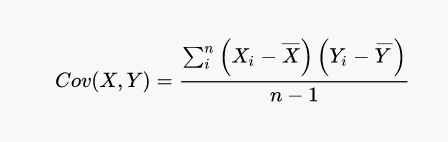

In [ ]:
def cov(x,y):
  dx = x-x.mean()
  dy = y-y.mean()
  return np.dot(dx,dy)/(len(x)-1)

In [ ]:
print('공분산(키,몸무게):', cov(heights,weights))

공분산(키,몸무게): 32055.13535269332


In [ ]:
print('공분산(키,몸무게):', np.cov(heights,weights)[1])

공분산(키,몸무게): [ 32055.13535269 194942.23130289]


# 상관관계


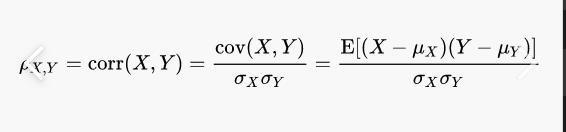

In [ ]:
def corr(x,y):
  std_x = x.std()
  std_y = y.std()
  if std_x>0 and std_y>0:
    return cov(x,y)/std_x/std_y
  else:
    return 0

In [ ]:
print('상관관계(키,몸무게):',corr(heights,weights))

상관관계(키,몸무게): 1.0675761438339537


In [ ]:
se_he = pd.Series(heights)
se_we = pd.Series(weights)
print('상관관계(키,몸무게):',se_he.corr(se_we))

상관관계(키,몸무게): 0.7117174292226357


# 확률



*   조건부 사건, 독립 사건

In [ ]:
pa = 1/2
pb = 1/6
print(f'P(a)={pa:2f}')
print(f'P(b)={pb:2f}')

P(a)=0.500000
P(b)=0.166667


In [ ]:
print('P(a and b) = P(a|b) * P(b)')

P(a and b) = P(a|b) * P(b)


In [ ]:
print('a와 b가 독립 사건일 때 P(a|b)=P(a)')
pab = pa*pb
print(f'P(a and b)=P(a|b)*P(b) = P(a)*P(b) = {pa*pb : 2f}')
print(f'P(a and b)=P(a|b)*P(b) = P(a)*P(b) = {pab : 2f}')


a와 b가 독립 사건일 때 P(a|b)=P(a)
P(a and b)=P(a|b)*P(b) = P(a)*P(b) =  0.083333
P(a and b)=P(a|b)*P(b) = P(a)*P(b) =  0.083333


선형회귀

In [ ]:
import math
def sigmoid(x):
  return math.exp(x) / (1+math.exp(x))

In [ ]:
xs = [x/100 for x in range(-500,500)] #-5 부터 5까지 0.01 단위로 나옴
print(xs)

[-5.0, -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92, -4.91, -4.9, -4.89, -4.88, -4.87, -4.86, -4.85, -4.84, -4.83, -4.82, -4.81, -4.8, -4.79, -4.78, -4.77, -4.76, -4.75, -4.74, -4.73, -4.72, -4.71, -4.7, -4.69, -4.68, -4.67, -4.66, -4.65, -4.64, -4.63, -4.62, -4.61, -4.6, -4.59, -4.58, -4.57, -4.56, -4.55, -4.54, -4.53, -4.52, -4.51, -4.5, -4.49, -4.48, -4.47, -4.46, -4.45, -4.44, -4.43, -4.42, -4.41, -4.4, -4.39, -4.38, -4.37, -4.36, -4.35, -4.34, -4.33, -4.32, -4.31, -4.3, -4.29, -4.28, -4.27, -4.26, -4.25, -4.24, -4.23, -4.22, -4.21, -4.2, -4.19, -4.18, -4.17, -4.16, -4.15, -4.14, -4.13, -4.12, -4.11, -4.1, -4.09, -4.08, -4.07, -4.06, -4.05, -4.04, -4.03, -4.02, -4.01, -4.0, -3.99, -3.98, -3.97, -3.96, -3.95, -3.94, -3.93, -3.92, -3.91, -3.9, -3.89, -3.88, -3.87, -3.86, -3.85, -3.84, -3.83, -3.82, -3.81, -3.8, -3.79, -3.78, -3.77, -3.76, -3.75, -3.74, -3.73, -3.72, -3.71, -3.7, -3.69, -3.68, -3.67, -3.66, -3.65, -3.64, -3.63, -3.62, -3.61, -3.6, -3.59, -3.58, -3.57, -3.56,

In [ ]:
ys = [sigmoid(x) for x in xs]
print(ys)

[0.006692850924284856, 0.006759660510713249, 0.006827132422138159, 0.0068952731326461444, 0.0069640891777620895, 0.007033587154995159, 0.007103773724388777, 0.007174655609074737, 0.007246239595831428, 0.0073185325356462235, 0.007391541344281971, 0.0074652730028476905, 0.007539734558373393, 0.007614933124389156, 0.0076908758815083305, 0.007767570078015002, 0.007845023030455632, 0.007923242124234984, 0.00800223481421624, 0.008082008625325397, 0.008162571153159897, 0.008243930064601564, 0.008326093098433782, 0.008409068065962979, 0.008492862851644354, 0.008577485413711986, 0.008662943784813163, 0.00874924607264706, 0.008836400460607722, 0.008924415208431322, 0.009013298652847822, 0.00910305920823688, 0.009193705367288097, 0.009285245701665574, 0.009377688862676856, 0.009471043581946106, 0.009565318672091674, 0.009660523027407903, 0.009756665624551358, 0.009853755523231264, 0.009951801866904326, 0.010050813883473756, 0.010150800885992722, 0.01025177227337196, 0.010353737531091752, 0.010456

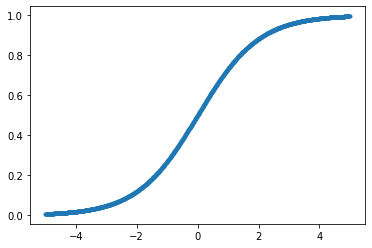

In [ ]:
import matplotlib.pyplot as pit
pit.plot(xs,ys,'.')
pit.show()

# 파일 입출력

In [ ]:
cat '/content/sample_data/iris.csv' #window 에서의 type과 동일한 기능 수행

"sepal.length","sepal.width","petal.length","petal.width","variety"
5.1,3.5,1.4,.2,"Setosa"
4.9,3,1.4,.2,"Setosa"
4.7,3.2,1.3,.2,"Setosa"
4.6,3.1,1.5,.2,"Setosa"
5,3.6,1.4,.2,"Setosa"
5.4,3.9,1.7,.4,"Setosa"
4.6,3.4,1.4,.3,"Setosa"
5,3.4,1.5,.2,"Setosa"
4.4,2.9,1.4,.2,"Setosa"
4.9,3.1,1.5,.1,"Setosa"
5.4,3.7,1.5,.2,"Setosa"
4.8,3.4,1.6,.2,"Setosa"
4.8,3,1.4,.1,"Setosa"
4.3,3,1.1,.1,"Setosa"
5.8,4,1.2,.2,"Setosa"
5.7,4.4,1.5,.4,"Setosa"
5.4,3.9,1.3,.4,"Setosa"
5.1,3.5,1.4,.3,"Setosa"
5.7,3.8,1.7,.3,"Setosa"
5.1,3.8,1.5,.3,"Setosa"
5.4,3.4,1.7,.2,"Setosa"
5.1,3.7,1.5,.4,"Setosa"
4.6,3.6,1,.2,"Setosa"
5.1,3.3,1.7,.5,"Setosa"
4.8,3.4,1.9,.2,"Setosa"
5,3,1.6,.2,"Setosa"
5,3.4,1.6,.4,"Setosa"
5.2,3.5,1.5,.2,"Setosa"
5.2,3.4,1.4,.2,"Setosa"
4.7,3.2,1.6,.2,"Setosa"
4.8,3.1,1.6,.2,"Setosa"
5.4,3.4,1.5,.4,"Setosa"
5.2,4.1,1.5,.1,"Setosa"
5.5,4.2,1.4,.2,"Setosa"
4.9,3.1,1.5,.2,"Setosa"
5,3.2,1.2,.2,"Setosa"
5.5,3.5,1.3,.2,"Setosa"
4.9,3.6,1.4,.1,"Setosa"
4.4,3,1.3,.2,"Setosa"
5.1,3.4,1.5,.2,"Seto

In [ ]:
df = pd.read_csv('/content/sample_data/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df2 = pd.read_table('/content/sample_data/iris.csv',sep=',')
df2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df3 = pd.read_table('/khr.abc',sep=',')
df3

,진협 : 23 : 99
0,유진 : 21 : 96
1,우진 : 18 : 81


data.csv 파일 

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')
df # 헤더 부분이 데이터값으로 나오므로 맘에 안듦

,1,강감찬,13,A
0,2,을지문덕,33,B
1,3,홍길동,22,O
2,4,이순신,45,AB


In [ ]:
df = pd.read_csv('/content/sample_data/data.csv',header=None) # 헤더 없음을 지정해주면 됨
df

,0,1,2,3
0,1,강감찬,13,A
1,2,을지문덕,33,B
2,3,홍길동,22,O
3,4,이순신,45,AB


In [ ]:
df.columns = ['번호','이름','나이','혈액형']
df

,번호,이름,나이,혈액형
0,1,강감찬,13,A
1,2,을지문덕,33,B
2,3,홍길동,22,O
3,4,이순신,45,AB


In [ ]:
df= pd.read_csv('/content/sample_data/data.csv',header=None, names = ['번호','이름','나이','혈액형']) # 이와 같이 한 번에 지정해 읽어오는 것도 가능(column 대신 names)
df

,번호,이름,나이,혈액형
0,1,강감찬,13,A
1,2,을지문덕,33,B
2,3,홍길동,22,O
3,4,이순신,45,AB


In [ ]:
#json 형태의 데이터

jdata = """
{
  "abstract":{
    "count":5,
    "company":"언제나휴일"
  },
  "documents":
  [
    {
      "name":"홍길동",
      "age":"20",
      "addr":"율도국"
    },
    {
      "name":"강감찬",
      "age":"23",
      "addr":"관악"
    },
    {
      "name":"을지문덕",
      "age":"42",
      "addr":"평양"      
    },
    {
      "name":"장언휴",
      "age":"27",
      "addr":"제주"
    },
    {
      "name":"이순신",
      "age":"46",
      "addr":"아산"
    }
  ]
}
"""
jdata

'\n{\n  "abstract":{\n    "count":5,\n    "company":"언제나휴일"\n  },\n  "documents":\n  [\n    {\n      "name":"홍길동",\n      "age":"20",\n      "addr":"율도국"\n    },\n    {\n      "name":"강감찬",\n      "age":"23",\n      "addr":"관악"\n    },\n    {\n      "name":"을지문덕",\n      "age":"42",\n      "addr":"평양"      \n    },\n    {\n      "name":"장언휴",\n      "age":"27",\n      "addr":"제주"\n    },\n    {\n      "name":"이순신",\n      "age":"46",\n      "addr":"아산"\n    }\n  ]\n}\n'

In [ ]:
import json

In [ ]:
result = json.loads(jdata)

In [ ]:
result

{'abstract': {'company': '언제나휴일', 'count': 5},
 'documents': [{'addr': '율도국', 'age': '20', 'name': '홍길동'},
  {'addr': '관악', 'age': '23', 'name': '강감찬'},
  {'addr': '평양', 'age': '42', 'name': '을지문덕'},
  {'addr': '제주', 'age': '27', 'name': '장언휴'},
  {'addr': '아산', 'age': '46', 'name': '이순신'}]}

In [ ]:
df = pd.DataFrame(result['documents'],columns=['name','addr'])
df

,name,addr
0,홍길동,율도국
1,강감찬,관악
2,을지문덕,평양
3,장언휴,제주
4,이순신,아산


In [ ]:
sd = {
    'name':['홍길동','강감찬','을지문덕'],
    'age':[27,47,20],
    'addr':['율도국','관악','평양']
}

df = pd.DataFrame(sd)
df

,name,age,addr
0,홍길동,27,율도국
1,강감찬,47,관악
2,을지문덕,20,평양


In [ ]:
jdata = df.to_json() #pandas DataFrame을 json으로 변환하는 과정
jdata

'{"name":{"0":"\\ud64d\\uae38\\ub3d9","1":"\\uac15\\uac10\\ucc2c","2":"\\uc744\\uc9c0\\ubb38\\ub355"},"age":{"0":27,"1":47,"2":20},"addr":{"0":"\\uc728\\ub3c4\\uad6d","1":"\\uad00\\uc545","2":"\\ud3c9\\uc591"}}'

train_titanic.csv

In [ ]:
path = '/midata/train_titanic.csv'
data = pd.read_csv(path)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Parch : 수직가족관계 

SibSp : 수평가족관계(형,누나,동생)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe() # survived는  1에 가까울수록 생존률 높음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
pd = data['PassengerId']
print(pd.value_counts())
print(pd.unique()) #집합 표시

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 

In [ ]:
sd = data['Survived']
print(sd.isnull())
print(sd.value_counts()) # 549 죽음 
print(sd.unique())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool
0    549
1    342
Name: Survived, dtype: int64
[0 1]


np = data

In [ ]:
nd = data['Name']
nd

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
def get_my_name_foo(ndata):
  f,s = ndata.split(',')
  print(s)

In [ ]:
get_my_name_foo(nd[21]) # 쉼표 앞 날리고 뒤에 이름만 나오게 

 Mr. Lawrence


In [ ]:
def get_my_name_foo(ndata):
  ndata = ndata.replace(' ','') # 공백 제거
  _,s = ndata.split(',')
  subs = s.split('.')
  return (subs[0])

In [ ]:
get_my_name_foo(nd[0])

'Mr'

In [ ]:
import pandas as pd
my_nd = []
for ndata in nd:
  re = get_my_name_foo(ndata)
  my_nd.append(re)
se = pd.Series(my_nd) #모든 승객 추출(mr,mrs,miss...)
se.value_counts() # mr,mrs,miss 개수 총합 추출

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
dtype: int64

mushroom.csv

In [ ]:
src = 'abcdef'
for c in src:
  print(c,ord(c)-ord('a')) # a로부터의 상대적 거리가 나옴 // ord(c) : ascii code값으로 변환

a 97
a 0
b 98
b 1
c 99
c 2
d 100
d 3
e 101
e 4
f 102
f 5


In [ ]:
for i in range(10):
  print(i+ord('a'), chr(i+ord('a')))

97 a
98 b
99 c
100 d
101 e
102 f
103 g
104 h
105 i
106 j


# 시각화

plot

In [ ]:
import matplotlib.pyplot as pit

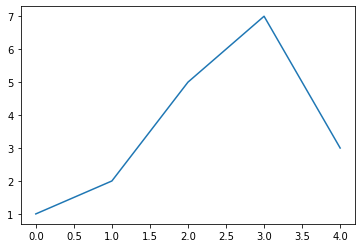

In [ ]:
pit.plot([1,2,5,7,3]) # 
pit.show()

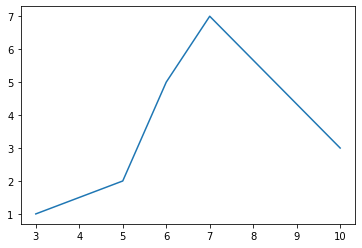

In [ ]:
pit.plot([3,5,6,7,10],[1,2,5,7,3]) # x축 값 넣어줄때
pit.show()

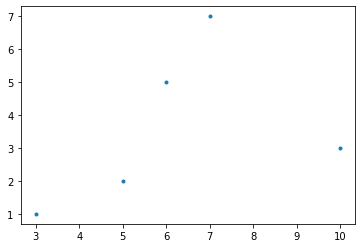

In [ ]:
pit.plot([3,5,6,7,10],[1,2,5,7,3],'.') # x축 값 넣어줄때
pit.show()

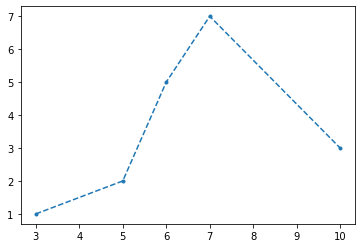

In [ ]:
pit.plot([3,5,6,7,10],[1,2,5,7,3],'.--') 
pit.show()

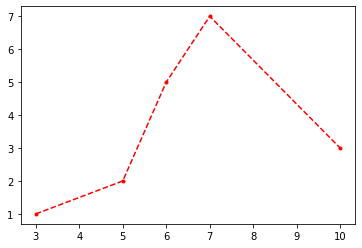

In [ ]:
pit.plot([3,5,6,7,10],[1,2,5,7,3],'.--r') 
pit.show()

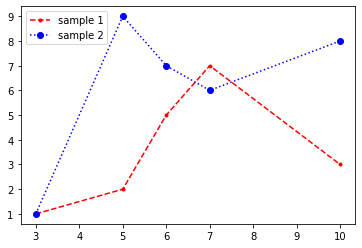

In [ ]:
pit.plot([3,5,6,7,10],[1,2,5,7,3],'.--r', label = 'sample 1')
pit.plot([ 3,5,6,7,10],[1,9,7,6,8],'o:b', label = 'sample 2') 
pit.legend() # 호출해야 범례표시가능
pit.show()

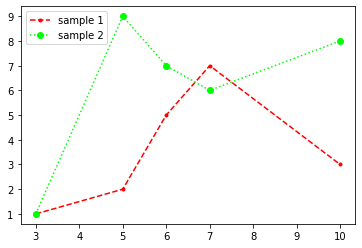

In [ ]:
pit.plot([3,5,6,7,10],[1,2,5,7,3],'.--r', color = '#FF0000' ,label = 'sample 1')
pit.plot([ 3,5,6,7,10],[1,9,7,6,8],'o:b',color = '#00FF00', label = 'sample 2') 
pit.legend()
pit.show()

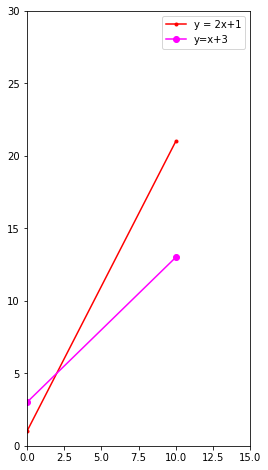

In [ ]:
pit.figure (figsize=(4,8))
pit.plot([0,10],[1,21],'.-', color = '#FF0000' ,label = 'y = 2x+1')
pit.plot([0,10],[3,13],'o-',color = '#FF00FF', label = 'y=x+3') 
pit.axis([0,15,0,30]) #x축 최대값 15 y축 최대값 30
pit.legend()
pit.show()